In [1]:
import os
import sys
os.chdir("../../PBD_analog/")

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
sys.path.append("modules")
from PBD_analog import PBD_to_time_dep_BD
from math import ceil

Get the PBD parameter values used for simulations.

In [2]:
# Load parameters from CSV
data = pd.read_csv("test_predictions/shape_sim_varBD_trees/sim_parameters.csv")

data.head()

,Unnamed: 0,param_vary,i_param_var,replicate,PBD.l1,PBD.l2,PBD.l3,PBD.mu1,PBD.mu2
0,1,1,1,NaN,0.050000,1.0,0.4,0.2,0.2
1,2,1,2,NaN,0.158114,1.0,0.4,0.2,0.2
2,3,1,3,NaN,0.500000,1.0,0.4,0.2,0.2
3,4,1,4,NaN,0.792447,1.0,0.4,0.2,0.2
4,5,1,5,NaN,1.255943,1.0,0.4,0.2,0.2


Construct the corresponding variable BD rates.

/Users/Jeremy/Nextcloud/Recherche/1_Methods/PBD_analog/modules/PBD_analog.py:234: RuntimeWarning: invalid value encountered in divide
  a = -np.log(1 - pS - pE) / t
/Users/Jeremy/Nextcloud/Recherche/1_Methods/PBD_analog/modules/PBD_analog.py:235: RuntimeWarning: invalid value encountered in divide
  b = pS / pE
/Users/Jeremy/Nextcloud/Recherche/1_Methods/PBD_analog/modules/PBD_analog.py:140: RuntimeWarning: invalid value encountered in sqrt
  pIE =  1/b * np.sqrt(num/den - 0.5*(l*(k-l) + 2*a*b))


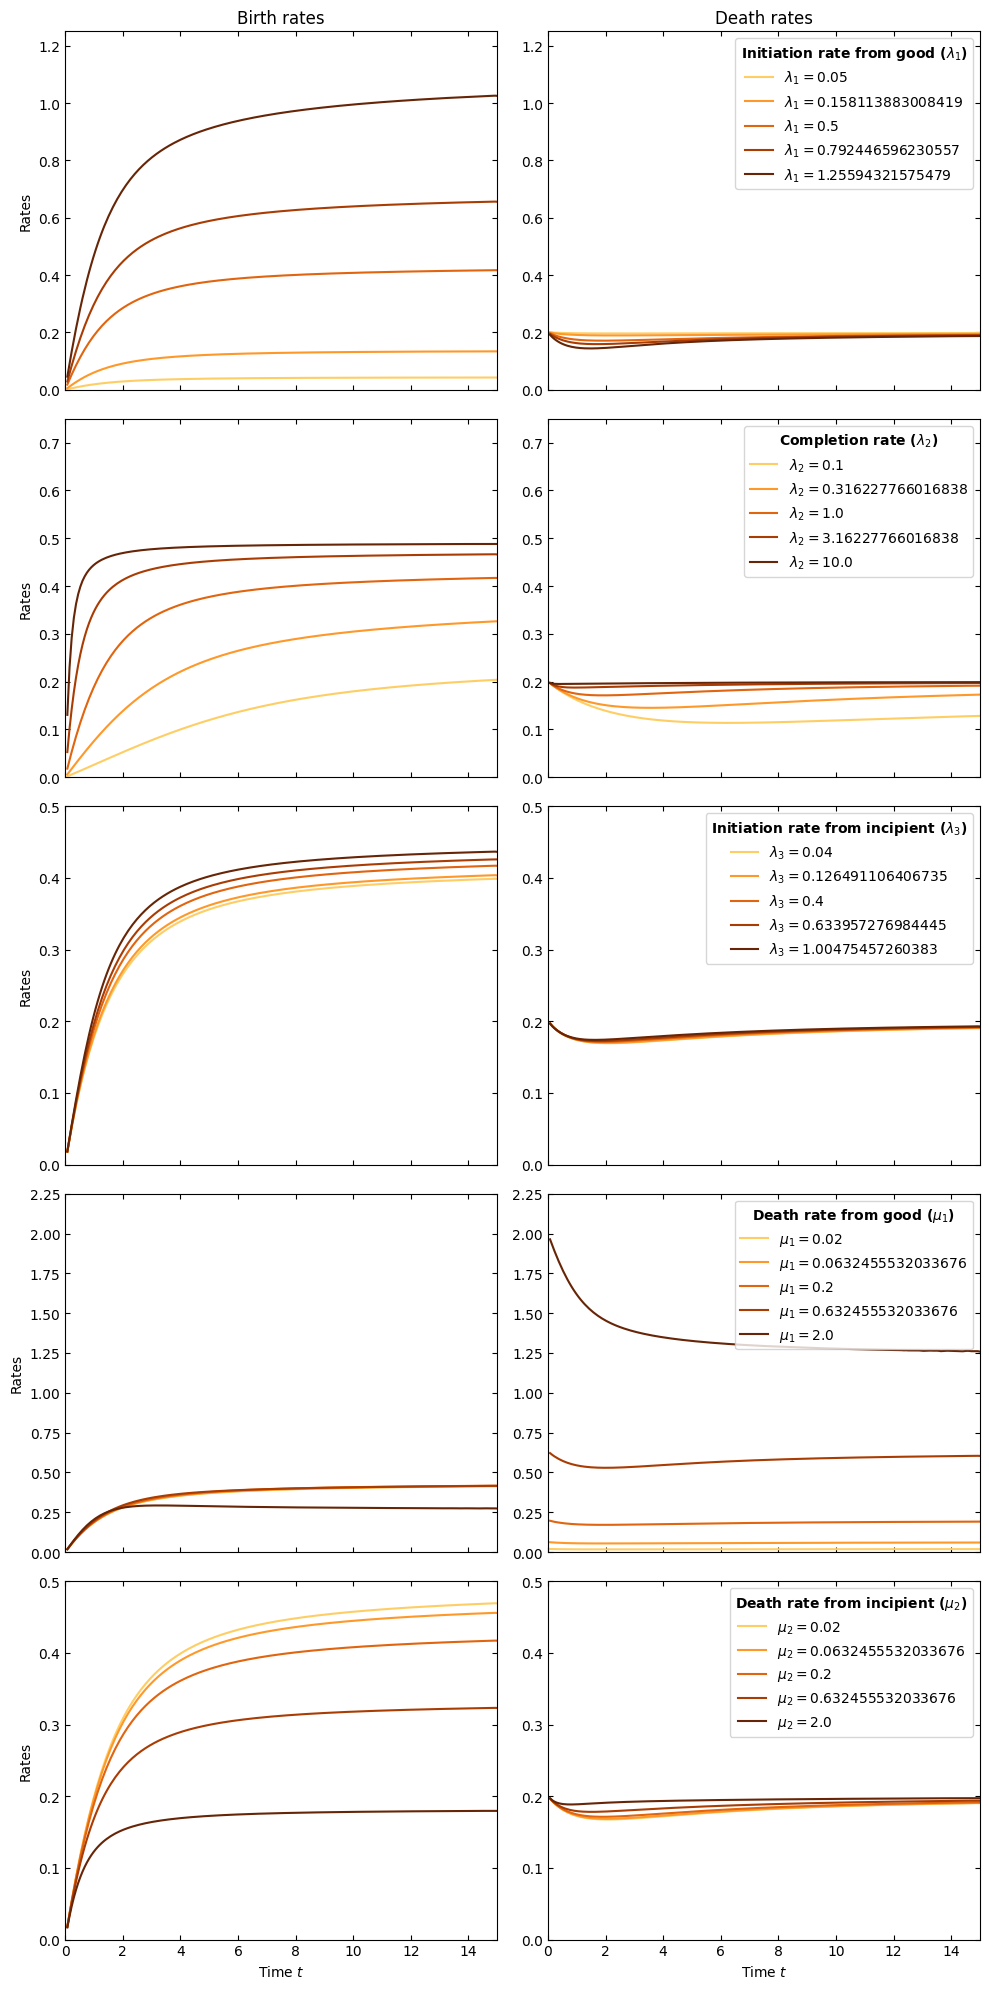

In [3]:
parameter_columns = ["l1", "l2", "l3", "m1", "m2"]

labels = ["\\lambda_1", "\\lambda_2", "\\lambda_3", "\\mu_1", "\\mu_2"]
titles = [r"Initiation rate from good ($\lambda_1$)", r"Completion rate ($\lambda_2$)", r"Initiation rate from incipient ($\lambda_3$)", 
          r"Death rate from good ($\mu_1$)", r"Death rate from incipient ($\mu_2$)"]
cmap = mpl.colormaps["YlOrBr"]
T = np.linspace(0, 15, 200)

#fig, axes = plt.subplots(len(parameter_columns), 2, sharex=True, sharey=True, figsize=(10, 20))
fig, axes = plt.subplots(len(parameter_columns), 2, sharex=True, sharey=False, figsize=(10, 20))
all_rates = []
for i, parameter in enumerate(parameter_columns):
    # Filter data to include only the rows where 'param_vary' matches the current parameter index (1-based)
    varying_data = data[data["param_vary"] == (i + 1)]

    if not varying_data.empty:  # Only proceed if there are rows where the parameter varies
        for index, row in varying_data.iterrows():
            # Extract the relevant parameters
            par_copy = {
                'l1': row["PBD.l1"],
                'l2': row["PBD.l2"],
                'l3': row["PBD.l3"],
                'm1': row["PBD.mu1"],
                'm2': row["PBD.mu2"]
            }

            l_equiv, m_equiv = PBD_to_time_dep_BD(T, **par_copy, solver_kwargs = dict(atol = 1e-9, rtol = 1e-12))
            lbl = f"${labels[i]} = {par_copy[parameter]}$"

            # Plot equivalent birth and death rates
            axes[i, 0].plot(T, l_equiv, label=lbl, color=cmap((index - i * len(varying_data) + 2) / (1 + len(varying_data))))
            axes[i, 1].plot(T, m_equiv, label=lbl, color=cmap((index - i * len(varying_data) + 2) / (1 + len(varying_data))))

            # Collect rates for saving
            rate_info = {
                'parameter': parameter,
                'parameter_value': par_copy[parameter],
                'birth_rate': l_equiv,
                'death_rate': m_equiv
            }
            all_rates.append(rate_info)

        lg = axes[i, 1].legend(loc=1, title=titles[i], title_fontproperties=dict(weight='bold'))

    axes[i, 0].set_ylabel("Rates")
    y_max = max(ceil(axes[i,0].get_ylim()[1]*4)/4, ceil(axes[i,1].get_ylim()[1]*4)/4)
    axes[i, 0].set_ylim(0, y_max)
    axes[i, 1].set_ylim(0, y_max)

    for k in (0, 1):
        axes[i, k].tick_params(axis="both", direction="in")
        axes[i, k].yaxis.set_ticks_position('both')
        axes[i, k].xaxis.set_ticks_position('both')

axes[0, 0].set_title("Birth rates")
axes[0, 1].set_title("Death rates")
axes[-1, 0].set_xlabel("Time $t$")
axes[-1, 1].set_xlabel("Time $t$")
axes[0, 0].set_xlim(T[0], T[-1])

plt.tight_layout()
plt.savefig("test_predictions/shape_sim_varBD_trees/PBD_time_dep_rates_variable_params.pdf")

np.save("test_predictions/shape_sim_varBD_trees/variable_BDrates.npy", all_rates)

In [4]:
all_rates

[{'parameter': 'l1',
  'parameter_value': 0.05,
  'birth_rate': array([       nan, 0.00143476, 0.00345331, 0.00518271, 0.00688565,
         0.00846699, 0.00997772, 0.01144738, 0.01281121, 0.01411007,
         0.01538276, 0.01657919, 0.017723  , 0.01879104, 0.01981224,
         0.02078286, 0.0216942 , 0.02259844, 0.02343339, 0.02422975,
         0.0249773 , 0.02569537, 0.02638097, 0.02702216, 0.02764056,
         0.02822289, 0.02877378, 0.02930742, 0.02980127, 0.03028266,
         0.0307406 , 0.0311686 , 0.03159371, 0.03198488, 0.03236635,
         0.03272636, 0.03306857, 0.03339459, 0.03370996, 0.03401356,
         0.0343002 , 0.03457359, 0.03483473, 0.03509078, 0.03533399,
         0.03556691, 0.03578689, 0.03600502, 0.03621041, 0.03640791,
         0.03659846, 0.03678023, 0.03695769, 0.03712651, 0.03728899,
         0.03744754, 0.03759863, 0.03774594, 0.03788646, 0.03802256,
         0.03815485, 0.03828078, 0.03840527, 0.03852368, 0.03863879,
         0.03874969, 0.03885763, 0.038961